In [2]:
import os
import pandas as pd

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_mef_Kd_UV/'

data = pd.read_csv(workdir + 'VEL.csv')

In [3]:
for name in data.columns[2:]:
    x = data[name][310:410]  - data[data.columns[1]][310:410]
    y = sum(x)/len(x)
    data[name] = data[name] - y
#data.to_csv(workdir + 'vel_corr.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'H2O_396', 'vel_0.5_396.5', 'vel_1_397', 'vel_1.5_397.5',
       'vel_2_398', 'vel_2.5_398.5', 'vel_3_399', 'vel_3.5_399.5', 'vel_4_400',
       'vel_4_400_prot_0.5', 'vel_4_400_prot_1', 'vel_4_400_prot_1.5',
       'vel_4_400_prot_2', 'vel_4_400_prot_3', 'vel_4_400_prot_4',
       'vel_4_400_prot_5', 'vel_4_400_prot_6', 'vel_4_400_prot_8',
       'vel_4_400_prot_10', 'vel_4_400_prot_12', 'vel_4_400_prot_16',
       'vel_4_400_prot_20', 'vel_4_400_prot_24', 'vel_4_400_prot_28',
       'vel_4_400_prot_32', 'vel_4_400_prot_36', 'vel_4_400_prot_40',
       'vel_4_400_prot_44', 'vel_4_400_prot_48', 'vel_4_400_prot_52',
       'vel_4_400_prot_56', 'vel_4_400_prot_60'],
      dtype='object')

(-0.05, 0.2)

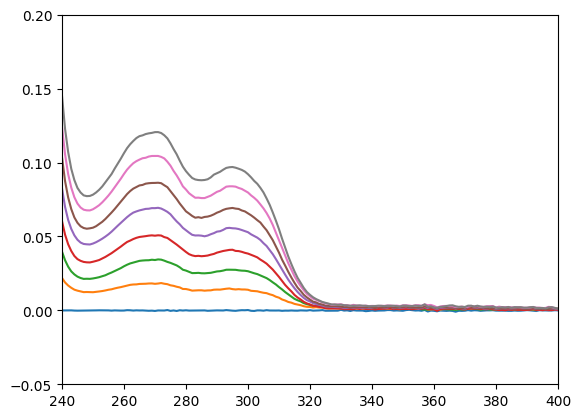

In [5]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for name in data.columns[1:9]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 400])
plt.ylim([-0.05, 0.2])

317
[[0.        ]
 [0.00126103]
 [0.00251889]
 [0.00377358]
 [0.00502513]
 [0.00627353]
 [0.0075188 ]
 [0.00876095]
 [0.01      ]]
0.9949250488537513
0.00035456813486755764
[2.05032368]


(-0.05, 0.1)

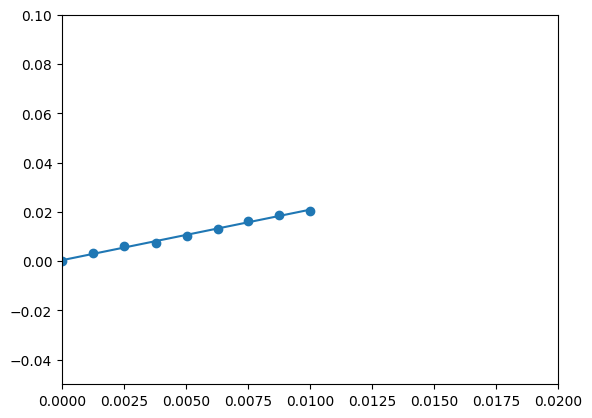

In [6]:

vel_xs = [0/396, 0.5/396.5, 1/397, 1.5/397.5, 2/398, 2.5/398.5, 3/399, 3.5/399.5, 4/400]
vel_ys = data.iloc[317-190, 1:10]


print(data.iloc[317-190, 0])

import numpy as np
from sklearn.linear_model import LinearRegression
vel_xs_re = np.array(vel_xs).reshape(-1, 1)
vel_reg_317 = LinearRegression().fit(vel_xs_re, vel_ys)
print(vel_xs_re)
print(vel_reg_317.score(vel_xs_re, vel_ys))
print(vel_reg_317.intercept_)
print(vel_reg_317.coef_)

fig,ax = plt.subplots()
ax.scatter(vel_xs, vel_ys)
vel_ys_317_pred = np.array([vel_reg_317.predict(np.array(xr).reshape(1, -1)) for xr in vel_xs_re])

ax.plot(vel_xs_re, vel_ys_317_pred)
plt.xlim([0, 0.02])
plt.ylim([-0.05, 0.1])


(-0.05, 0.2)

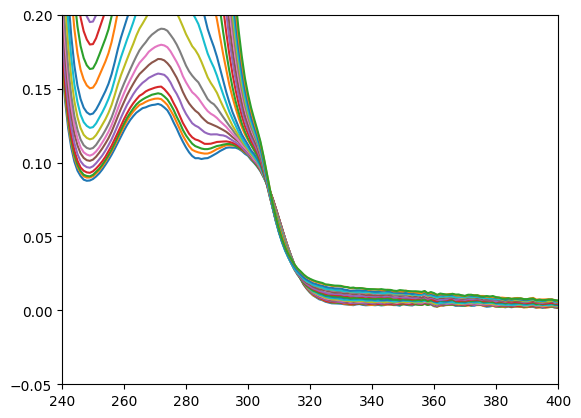

In [7]:
fig,ax = plt.subplots()
for name in data.columns[10:]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 400])
plt.ylim([-0.05, 0.2])

In [8]:
prot599 = pd.read_csv(workdir + '230402_protein_conc_599.csv')

prot599.columns

Index(['Wavelength [nm]', 'TBS', '599_400_2', '599_402_4', '599_404_6',
       '599_406_8', '599_408_10', '599_410_12', 'TBS2', '599_400_2.1',
       '599_402_4.1', '599_404_6.1', '599_406_8.1', '599_408_10.1',
       '599_410_12.1'],
      dtype='object')

In [41]:
for name in prot599.columns[2:8]:
    print(name)
    x = prot599[name][310:410]  - prot599[prot599.columns[1]][310:410]
    y = sum(x)/len(x)
    prot599[name] = prot599[name] - y

599_400_2
599_402_4
599_404_6
599_406_8
599_408_10
599_410_12


In [9]:
for name in prot599.columns[9:]:
    print(name)
    x = prot599[name][310:410]  - prot599[prot599.columns[8]][310:410]
    y = sum(x)/len(x)
    prot599[name] = prot599[name] - y

599_400_2.1
599_402_4.1
599_404_6.1
599_406_8.1
599_408_10.1
599_410_12.1


[0, 0.005, 0.009950248756218905, 0.01485148514851485, 0.019704433497536946, 0.024509803921568627, 0.02926829268292683]


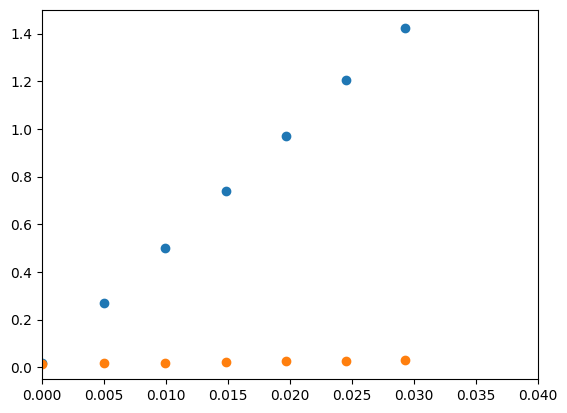

In [10]:
fig,ax = plt.subplots()
xs = [0, 2/400, 4/402, 6/404, 8/406, 10/408, 12/410]
ys_280 = prot599.iloc[280-190, 8:]
ys_317 = prot599.iloc[317-190, 8:]
ax.scatter(xs, ys_280)
ax.scatter(xs, ys_317)

plt.xlim([0, 0.04])
plt.ylim([-0.05, 1.5])
print(xs)

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
xs_re = np.array(xs).reshape(-1, 1)
reg_280 = LinearRegression().fit(xs_re, ys_280)
print(xs_re)
print(reg_280.score(xs_re, ys_280))
print(reg_280.intercept_)

ys_280_corr = ys_280 - reg_280.intercept_
prot_conc = ys_280_corr/11460*1000*1000
print(prot_conc)
factors = [400/2, 402/4, 404/6, 406/8, 408/10, 410/12]
prot_conc_stock = []
for i in range(6):
    prot_conc_stock.append(prot_conc[i+1]*factors[i])
print(prot_conc)
print(prot_conc_stock)
print(np.mean(prot_conc_stock[1:]))


[[0.        ]
 [0.005     ]
 [0.00995025]
 [0.01485149]
 [0.01970443]
 [0.0245098 ]
 [0.02926829]]
0.9999311693175621
0.023628449991735745
TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
[4280.127848137247, 4188.756072575092, 4202.529150929301, 4185.836667923378, 4211.395663635705, 4178.412829706141]
4193.386076953922


[[0.        ]
 [0.005     ]
 [0.00995025]
 [0.01485149]
 [0.01970443]
 [0.0245098 ]
 [0.02926829]]
0.9958399928105744
0.013261708664681533
[0.59940728]


(-0.05, 0.1)

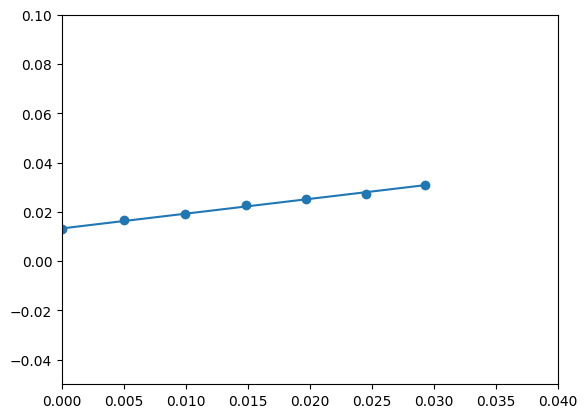

In [12]:
reg_317 = LinearRegression().fit(xs_re, ys_317)
print(xs_re)
print(reg_317.score(xs_re, ys_317))
print(reg_317.intercept_)
print(reg_317.coef_)


fig,ax = plt.subplots()
ys_317 = prot599.iloc[317-190, 8:]
ax.scatter(xs_re, ys_317)
ys_317_pred = np.array([reg_317.predict(np.array(xr).reshape(1, -1)) for xr in xs_re])

ax.plot(xs_re, ys_317_pred)
plt.xlim([0, 0.04])
plt.ylim([-0.05, 0.1])




TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
TBS2            0.012939
599_400_2.1     0.016626
599_402_4.1     0.018920
599_404_6.1     0.022740
599_406_8.1     0.025153
599_408_10.1    0.027401
599_410_12.1    0.030962
Name: 127, dtype: float64
[0.00014296]
0.013261957754802928


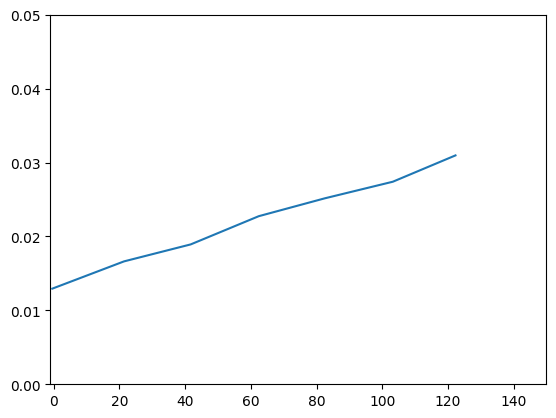

In [13]:
fig,ax = plt.subplots()
reg_prot_317_conc = LinearRegression().fit(np.array(prot_conc).reshape(-1, 1), ys_317)
print(prot_conc)
print(ys_317)
ax.plot(prot_conc, ys_317)
plt.xlim([-1, 150])
plt.ylim([0, 0.05])
print(reg_prot_317_conc.coef_)
print(reg_prot_317_conc.intercept_)

real_titri_ys-----------------------------------
vel_4_400             0.020482
vel_4_400_prot_0.5    0.021059
vel_4_400_prot_1      0.021469
vel_4_400_prot_1.5    0.021640
vel_4_400_prot_2      0.021564
vel_4_400_prot_3      0.022097
vel_4_400_prot_4      0.022765
vel_4_400_prot_5      0.022409
vel_4_400_prot_6      0.023293
vel_4_400_prot_8      0.022032
vel_4_400_prot_10     0.022182
vel_4_400_prot_12     0.022654
vel_4_400_prot_16     0.023298
vel_4_400_prot_20     0.021242
vel_4_400_prot_24     0.021921
vel_4_400_prot_28     0.022028
vel_4_400_prot_32     0.022938
vel_4_400_prot_36     0.023823
vel_4_400_prot_40     0.023391
vel_4_400_prot_44     0.023654
vel_4_400_prot_48     0.023557
vel_4_400_prot_52     0.024329
vel_4_400_prot_56     0.026026
vel_4_400_prot_60     0.026315
Name: 127, dtype: float64


(-0.02, 0.03)

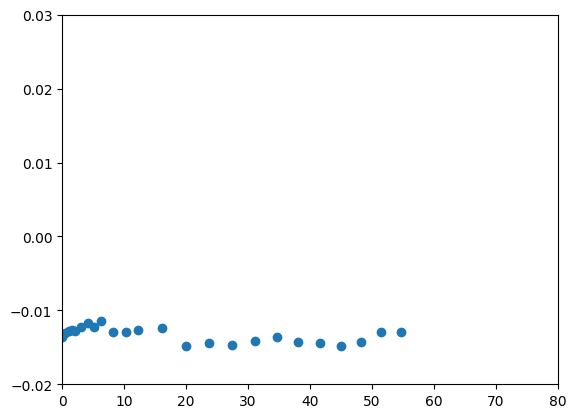

In [29]:
titri_adds = [0, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 8, 10, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60]
#print('titri_adds-----------------------------------')
#print(titri_adds)
titri_vols = [z + 400 for z in titri_adds]
#print('titri_vols-----------------------------------')
#print(titri_vols)
prot_conc_xs = [titri_adds[i]*419.3/titri_vols[i] for i in range(len(titri_adds))]
prot_conc_ys = reg_prot_317_conc.predict(np.array(prot_conc_xs).reshape(-1, 1))

vel_titri_xs = np.array([4/x for x in titri_vols]).reshape(-1, 1)
#print('vel_titri_xs-----------------------------------')
#print(vel_titri_xs)

vel_titri_ys = vel_reg_317.predict(vel_titri_xs)
#print('vel_titri_ys-----------------------------------')
#print(vel_titri_ys)

real_titri_ys = data.iloc[317-190, 9:]
print('real_titri_ys-----------------------------------')
print(real_titri_ys)

corr_titri_ys = real_titri_ys - vel_titri_ys - prot_conc_ys

fig,ax = plt.subplots()
ax.scatter(prot_conc_xs, corr_titri_ys)


plt.xlim([0, 80])
plt.ylim([-0.02, 0.03])
